##  [05] 데이터 전처리

 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본사항이 있음. 
 
 - 결손값, 즉 NaN,Null 값은 허용되지 않음. 이러한 Null 값은 고정된 다른 값으로 변환해야 함. (Null 값이 대부분이라면 해당 피처를 드롭하는 것이 좋음)
 - 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않음. 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 함. 
     - 카테고리형 피처
     - 텍스트형 피처 : 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제.

### [데이터 인코딩] 

**1. 레이블 인코딩**
 
 : 카테고리 피처를 코드형 숫자 값으로 변환하는 것.
  - LabelEncoder 클래스로 구현. 
  - fit(), transform()을 호출해 레이블 인코딩을 수행함. 


In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


TV는 0, 냉장고는 1, 전자레인지는 4, 컴퓨터는 5, 선풍기는 3, 믹서는 2로 변환.

In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


 - inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있음. 

In [4]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩 값은 단순 코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안됨. 따라서 레이블 인코딩은 선형 회귀같은 ML 알고리즘에는 적용하지 않아야 함. 

**2. 원-핫 인코딩**

: 피처값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식. 

-> 행 형태로 되어있는 피처의 고유값을 열 형태로 차원을 변환. 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시.

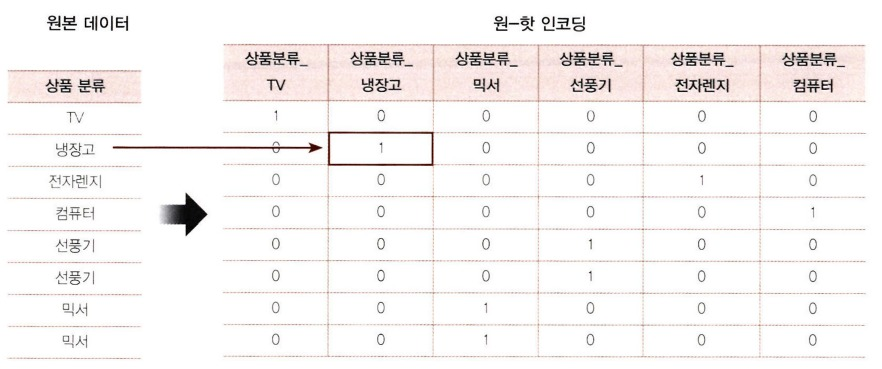

 - 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능. 
    - OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형으로 변환돼야 한다는 것. 
    - 입력값으로 2차원 데이터가 필요함.

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
#2차원 데이터로 변환.
labels = labels.reshape(-1,1)

#원-핫 인코딩을 적용함.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


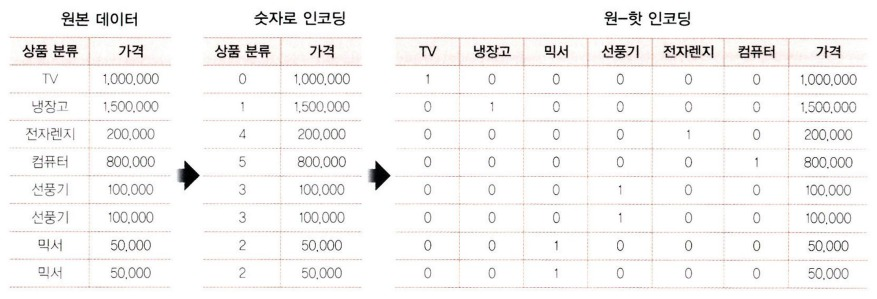

------------------------------------
판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있음. get_dummies()를 이용.

문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환.

In [7]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기', '믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### [피처 스케일링과 정규화]

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 함. 

대표적인 방법으로 표준화와 정규화가 있음. 

1. 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 뷴포를 가진 값으로 변환하는 것.

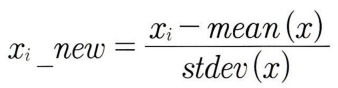

2. 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념. 
    
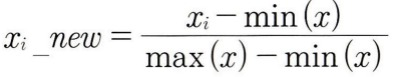 

### [StandardScaler] 

: 표준화를 쉽게 지원하기 위한 클래스. 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해줌. 

-> 이러한 표준화 과정은 RBF커널을 이용하는 서포트 벡터 머신, 선형회귀, 로지스틱 회귀 등등의 알고리즘에서 예측 성능 향상에 매우 중요함. 

In [9]:
from sklearn.datasets import load_iris
import pandas as pd 
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환. 
iris=load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


StandardScaler 객체를 생성한 후에 fit()과 transform()메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 표준화가 됨. 

 - transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환함. 

In [11]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 알 수 있음.

### [MinMaxScaler] 

 : 데이터값을 0과 1사이의 범위 값으로 변환. 

In [12]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환.
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### [학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점] 

StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용. 

- fit()은 데이터 변환을 위한 기준 정보 설정을 적용
- transform()은 이렇게 설정도니 정보를 이용해 데이터를 변환

**주의할점!**

 : 학습 데이터 세트로 fit()과 transform()을 적용하면, 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 transform()을 적용해야 함. 

**<테스트 데이터에 fit()을 적용할 때>**

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(),transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변겅
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [15]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0-1 값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨.
train_scaled  = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


테스트 데이터 세트를 변환하는데, fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과를 확인.

In [16]:
#MinMaxScaler에 test_array를 fit()하게 되면서 원본 데이터의 최솟값이 0,최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력.
print('원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


-> 학습데이터와 테스트데이터의 서로 다른 원본 값이 동일한 값으로 변환되는 결과를 초래.

머신러닝 모델에서 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함!

**<테스트 데이터에 fit()을 호출하지 않음>**

In [17]:
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:',np.round(train_array.reshape(-1),1))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
#fit_transform() 은 테스트 데이터에서 사용하면 안된다
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


-------------------------------------
fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메소드. 

-> 학습데이터에서는 가능. 테스트 데이터에서는 절대 사용해서는 안됨. 

## [06]  사이킷런으로 수행하는 타이타닉 생존자 예측

 : 타이타닉 탑승자 데이터를 기반으로 생존자 예측을 사이킷런으로 수행. 152

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('C:/data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


891개의 로우와 12개의 칼럼
각 행의 널값 개수. 타입을 알 수 있음. 

1. 사이킷런 머신러닝 알고리즘을 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할 지 결정해야 함. 

 - fillna()함수를 사용해 Null값을 평균 또는 고정 값으로 변경.

In [24]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


문자열 피처의 값 분류를 살펴봄. 

In [25]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


 - Cabin의 경우 N이 너무 많고 속성값이 정리 되지 않음. 
     - Cabin 속성값의 앞문자만 추출

In [28]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


2. 머신러닝 알고리즘으로 예측을 수행하기 전에 데이터를 먼저 탐색.
 - 어떤 유형의 승객이 생존 확률이 높았는지

In [31]:
#성별에 따른 생존자 수 
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survived 칼럼은 레이블로서 결정 클래스 값

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

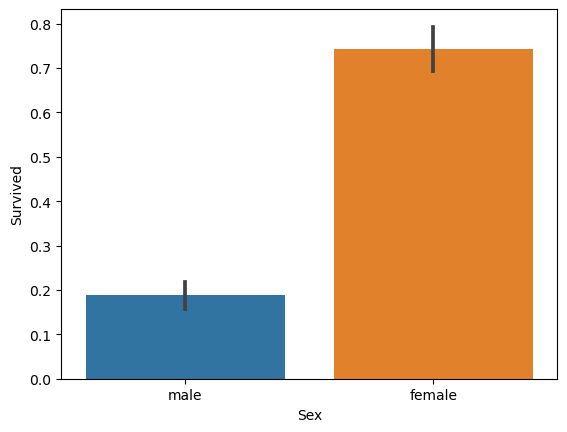

In [32]:
sns.barplot(x='Sex',y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

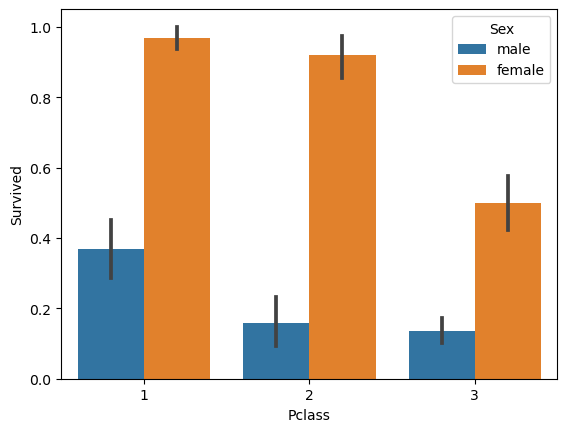

In [33]:
# 부자와 가난한 사람 간의 생존 확률
# 객실등급으로 부를 측정하여 생존확률을 살펴봄. 
sns.barplot(x='Pclass',y='Survived', hue = 'Sex', data=titanic_df)

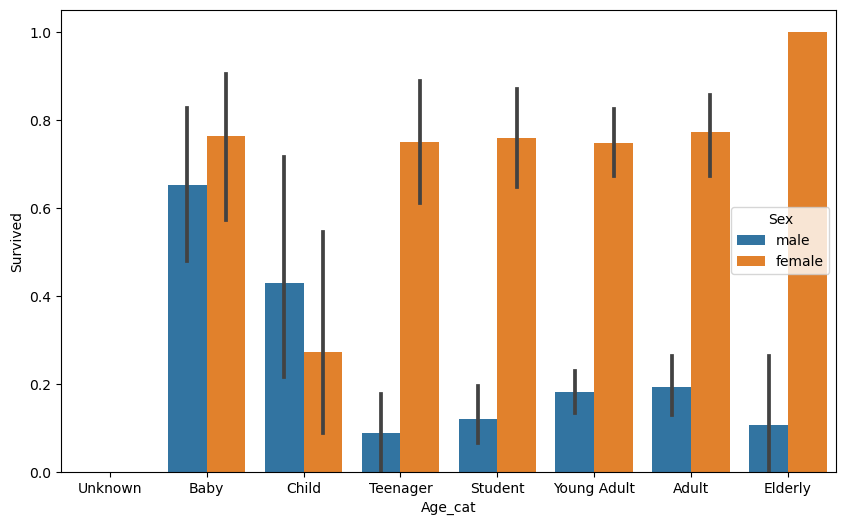

In [35]:
#age에 따른 생존확률
#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else : cat='Elderly'
        
    return cat

#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] =  titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환. 

 - 인코딩은 사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩을 적용.
 - fit(), transform()으로 데이터를 변환.
 - encode_features()함수를 새로 생성해 한 번에 변환하도록 함. 

In [36]:
#문자열 -> 숫자형 카테고리 변환
from sklearn import preprocessing

#함수를 생성해 여러 칼럼 한 번에 변환
def encode_features(dataDF):
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


3. 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 재사용할 수 있도록 만듦.

 - 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features(). Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성. 

In [37]:
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

#레이블 인코딩 수행:
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

이제 transform_features()을 이용해 원본 데이터를 가공. 

In [38]:
titanic_df = pd.read_csv('C:/data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size = 0.1, random_state = 11)
     

ML 알고리즘인 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측.

사이킷런 클래스를 이용해 분리한 학습데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고 예측할 것임. 

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))
     

DecisionTreeClassifier 정확도:0.8111
RandomForestClassifier 정확도: 0.8000
LogisticRegression 정확도:0.8556


C:\Users\june0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있음. 

교차검증으로 결정 트리 모델을 좀 더 평가해 보겠음. 

In [41]:
# 1) KFold 클래스 이용 : 폴드 개수 5개
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  #폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores=[]

  #KFold 교차 검증 수행
  for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
    #titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
    y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
    #Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print('교차 검증{0} 정확도:{1:.4f}'.format(iter_count,accuracy))

  #5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('평균 정확도:{0:.4f}'.format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증0 정확도:0.7542
교차 검증1 정확도:0.7809
교차 검증2 정확도:0.7865
교차 검증3 정확도:0.7697
교차 검증4 정확도:0.8202
평균 정확도:0.7823


In [42]:
# 2) cross_val_score() 이용 : Stratified KFold 이용하기에 위와 결과가 다르게 나옴
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도:{0:.4f}'.format(iter_count,accuracy))

print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도:0.0000
교차 검증 1 정확도:1.0000
교차 검증 2 정확도:2.0000
교차 검증 3 정확도:3.0000
교차 검증 4 정확도:4.0000
평균 정확도:0.7879


In [43]:
# 3) GridSearchCV() 이용
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
              'min_samples_split' : [2,3,5], 'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid = parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.8252
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8000
